In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import export_text


In [22]:
paths = ["prices_round_2_day_-1.csv", "prices_round_2_day_0.csv", "prices_round_2_day_1.csv"]
# initialize df
df = pd.DataFrame()
for i, path in enumerate(paths):
    # concat df
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    df = pd.concat([df, new_df])


In [23]:
df.head()


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1


In [55]:
x = df[['SUNLIGHT', 'HUMIDITY']].iloc[1:df.shape[0]].reset_index(drop=True)
y = df['ORCHIDS'].iloc[1:df.shape[0]].reset_index(drop=True)


In [56]:
x_o = df['ORCHIDS'].iloc[0:df.shape[0]-1].reset_index(drop=True)
x_n = df['ORCHIDS'].iloc[1:df.shape[0]].reset_index(drop=True)
prev = x_n - x_o

In [57]:
x

,SUNLIGHT,HUMIDITY
0,2499.4197,79.00410
1,2498.8457,79.00821
2,2498.2780,79.01234
3,2497.7166,79.01649
4,2497.1614,79.02066
...,...,...
29997,2299.9436,69.93549
29998,2299.9556,69.95153
29999,2299.9690,69.96762
30000,2299.9840,69.98378


In [52]:
prev

0        1.75
1        0.00
2        0.00
3        0.00
4       -1.50
         ... 
29997   -2.50
29998    0.00
29999    0.00
30000   -2.00
30001    1.00
Name: ORCHIDS, Length: 30002, dtype: float64

In [58]:
x = pd.concat([x, x_o], axis=1)

In [59]:
x

,SUNLIGHT,HUMIDITY,ORCHIDS
0,2499.4197,79.00410,1200.00
1,2498.8457,79.00821,1201.75
2,2498.2780,79.01234,1201.75
3,2497.7166,79.01649,1201.75
4,2497.1614,79.02066,1201.75
...,...,...,...
29997,2299.9436,69.93549,1038.75
29998,2299.9556,69.95153,1036.25
29999,2299.9690,69.96762,1036.25
30000,2299.9840,69.98378,1036.25


In [29]:
(prev > 0).sum()/prev.shape[0]

0.4046396906872875

In [47]:
# x = pd.concat([x, prev], axis=0)

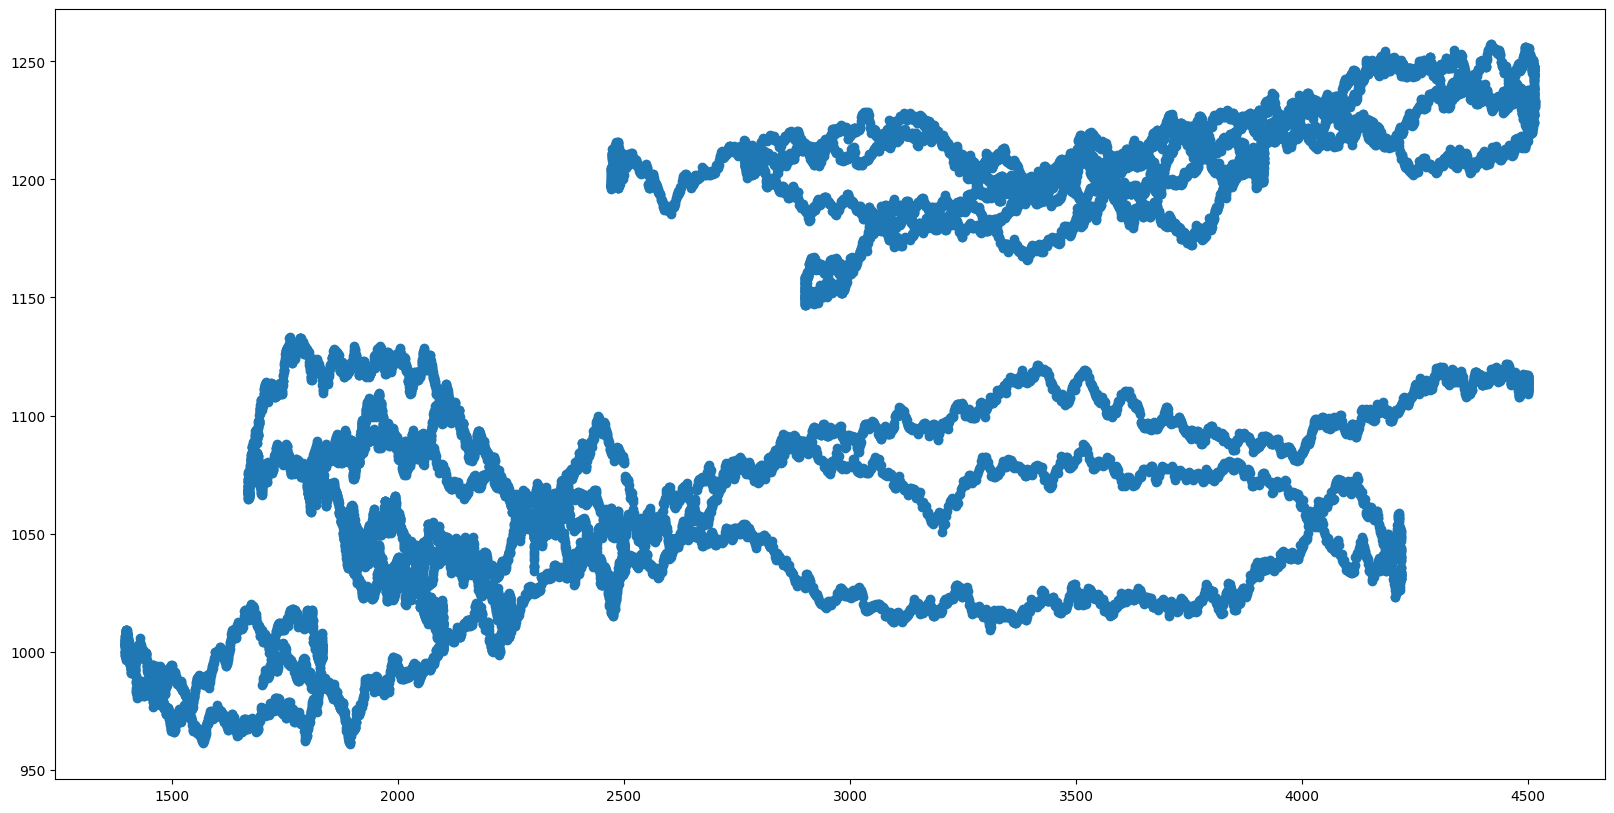

In [63]:
plt.figure(figsize=(20, 10))
plt.scatter(x['SUNLIGHT'], y)


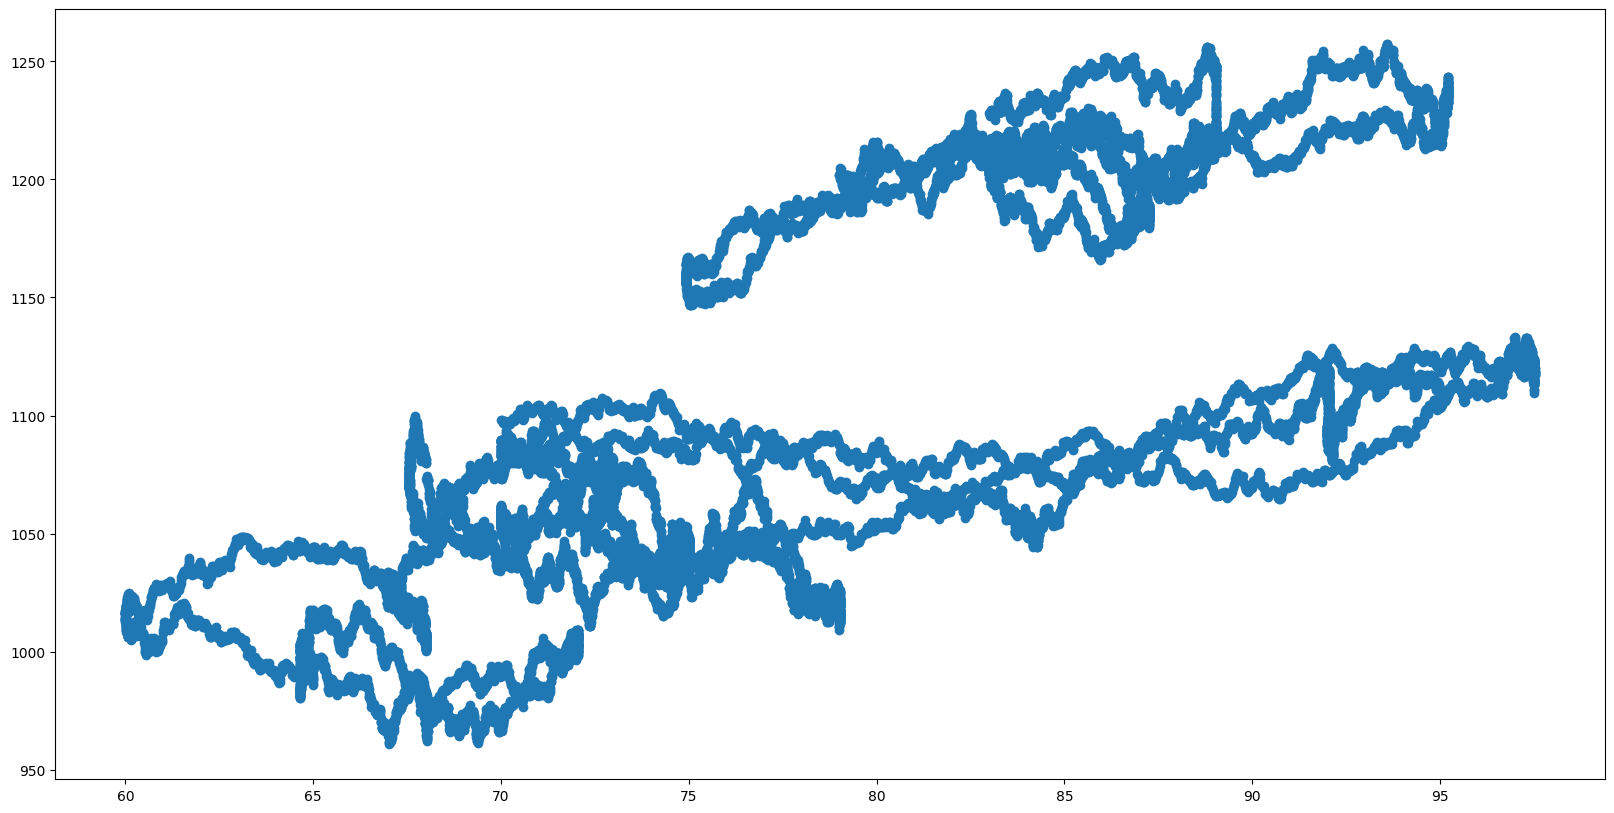

In [64]:
plt.figure(figsize=(20, 10))
plt.scatter(x['HUMIDITY'], y)


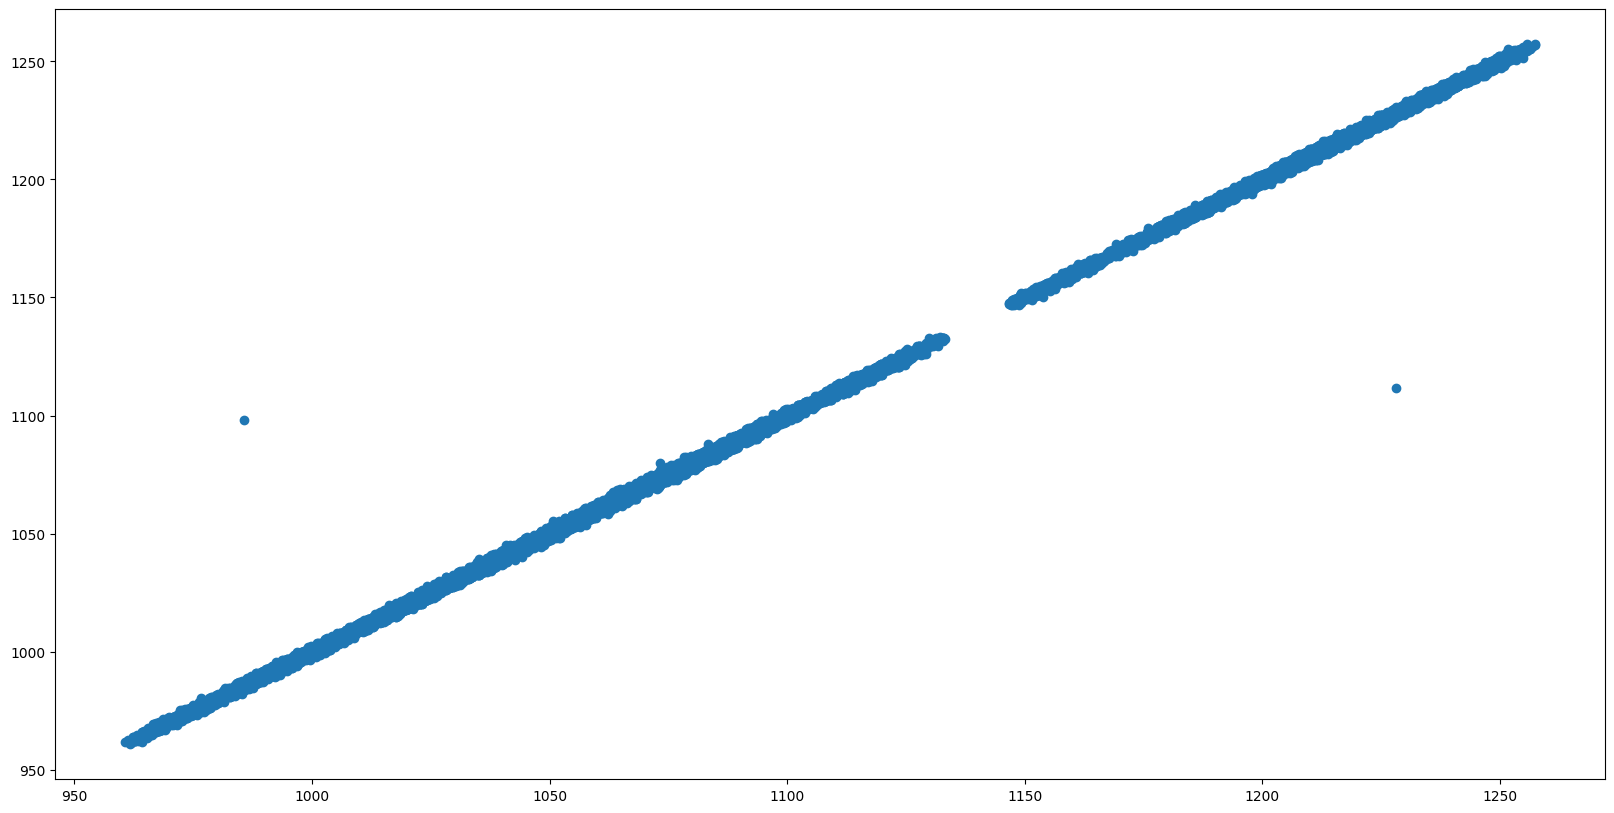

In [65]:
plt.figure(figsize=(20, 10))
plt.scatter(x['ORCHIDS'], y)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100, shuffle=False)


In [33]:
reg_model = linear_model.LinearRegression()


In [34]:
reg_model = LinearRegression().fit(x_train, y_train)


In [35]:
print('Intercept: ', reg_model.intercept_)
list(zip(x, reg_model.coef_))


Intercept:  756.1375205980627


[('SUNLIGHT', 0.054945657417507135), ('HUMIDITY', 2.5863209214131837)]

In [36]:
y_pred= reg_model.predict(x_test)  
x_pred= reg_model.predict(x_train) 


In [37]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff


,Actual value,Predicted value
4000,1056.75,1071.313960
4001,1056.75,1071.297529
4002,1057.25,1071.281145
4003,1058.25,1071.264831
4004,1057.25,1071.248584
...,...,...
9996,1036.25,1063.385055
9997,1036.25,1063.427199
9998,1036.25,1063.469549
9999,1034.25,1063.512168


In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(51.98882016522703, 70.8252498774397, -13.506438336099494)

In [39]:
random_forest_model = RandomForestRegressor(n_estimators=5, random_state=42)


In [40]:
random_forest_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=5, random_state=42)

In [41]:
random_forest_model = RandomForestRegressor(n_estimators=5, random_state=42)
random_forest_model.fit(x_train, y_train)

y_pred_forest = random_forest_model.predict(x_test)


In [42]:
forest_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_forest})
forest_model_diff


,Actual value,Predicted value
4000,1056.75,1040.85
4001,1056.75,1040.85
4002,1057.25,1040.85
4003,1058.25,1040.85
4004,1057.25,1040.85
...,...,...
9996,1036.25,1043.45
9997,1036.25,1043.45
9998,1036.25,1043.45
9999,1034.25,1043.45


In [43]:
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = mse_forest ** 0.5
r2_forest = r2_score(y_test, y_pred_forest)

print(mae_forest, rmse_forest, r2_forest)

tree_representation = export_text(random_forest_model.estimators_[0])
print(len(random_forest_model.estimators_))

(1.758418041437537, 6.858226322353218, 0.9929945913565444)